In [12]:
import scipy.io as sio
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Problem 1

In [44]:
mat_contents = sio.loadmat('05HW1_diabetes.mat')

x_train = mat_contents['x_train']
y_train = mat_contents['y_train']
x_test = mat_contents['x_test']
y_test = mat_contents['y_test']

lambdas = [0.01 , 0.1 , 1 , 10 , 100, 1000]

In [124]:
def lasso(l):
    lasso = Lasso(alpha=l)
    lasso.fit(x_train, y_train)

    return lasso, lasso.coef_

def ridge(l):
    ridge = Ridge(alpha=l)
    ridge.fit(x_train, y_train)

    return ridge, ridge.coef_[0]

def regression(func):
    beta = []
    train_error = []
    test_error = []

    for l in lambdas:
        model, coef = func(l)
        beta.append(coef)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        train_error.append(mean_squared_error(y_train, y_train_pred))
        test_error.append(mean_squared_error(y_test, y_test_pred))

    return beta, train_error, test_error

def plot(beta, train_error, test_error, title, plot_train_error=False):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Coefficient vs lambda with {title} regression')
    plt.semilogx(lambdas, beta)
    plt.xlabel('lambda')
    plt.ylabel('Coefficient')
    plt.subplot(1, 2, 2)
    plt.title(f'Test error vs lambda with {title} regression')
    if plot_train_error:
        plt.semilogx(lambdas, train_error, 'o', color='blue', label='train_error')
    plt.semilogx(lambdas, test_error, 'o', color='orange', label='test_error')
    plt.xlabel('lambda')
    plt.ylabel('error')
    plt.legend()
    plt.show()

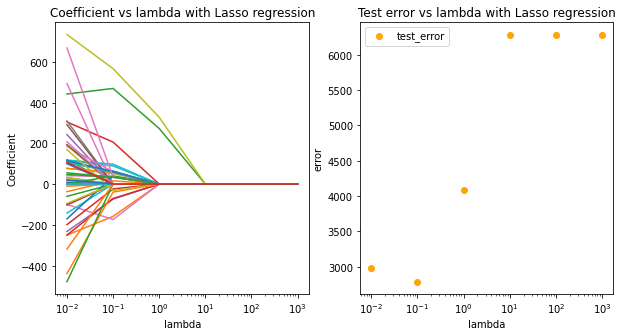

In [83]:
beta, train_error, test_error = regression(lasso)
plot(beta, train_error, test_error, 'Lasso')

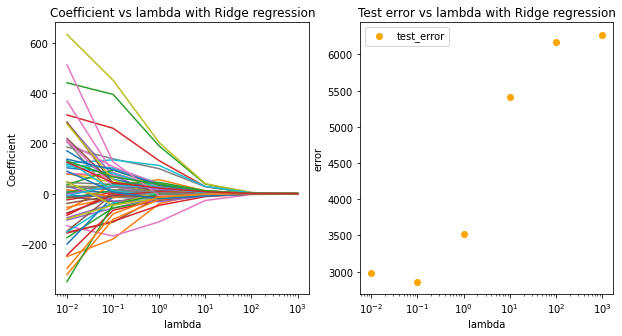

In [84]:
beta, train_error, test_error = regression(ridge)
plot(beta, train_error, test_error, 'Ridge')

## (a)
隨著 $\lambda$ 變大, $\beta$ 越趨近於0. \
LASSO: $L=min( ||(y-X \beta)||^2+\lambda||\beta||)$

## (b)
Test error 在 $\lambda=0.1$ 時最小，而後隨著 $\lambda$ 變大 error 上升。

## (c)
Ridge 在 $\lambda$ 變大後收斂到0的速度比 LASSO 慢。
對於 test error 的變化也較 Ridge 平緩。

# Probelm 2

In [128]:
with open("05HW2_wine_training.txt", 'r') as txt:
    train = txt.read().split('\n')

train = [[float(y) for y in x.split(' ') if y != ''] for x in train]
train.remove([])
with open("05HW2_wine_test.txt", 'r') as txt:
    test = txt.read().split('\n')

test = [[float(y) for y in x.split(' ') if y != ''] for x in test]
test.remove([])
lambdas = [0.0001*(5**i) for i in range(10)]

x_train = [x[:-1] for x in train]
y_train = [x[-1] for x in train]
x_test = [x[:-1] for x in test]
y_test = [x[-1] for x in test]

In [129]:
beta, train_error, test_error = regression(lasso)

## (a)

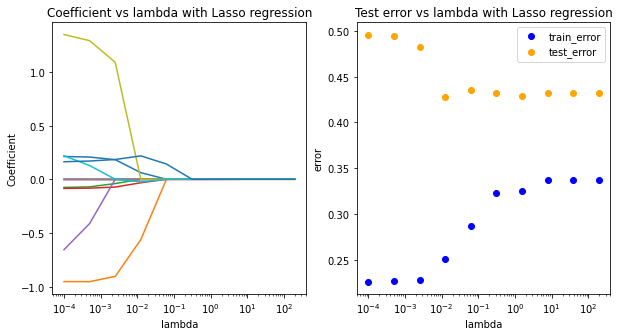

In [130]:
plot(beta, train_error, test_error, 'Lasso', plot_train_error=True)

## (b)
當 $\lambda<0.0125$ 時，model overfitting.
當 $\lambda>0.0125$ 時，model underfitting.

## (c)
由圖可以知道當 $\lambda=0.0125$ 時有小的 test error，同時 model 也沒有 underfitting，因此選擇 $\lambda=0.0125$ 作為模型訓練所用的參數。